In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import cleaned dataframe from the datawrangling module
df = pd.read_csv('data/df_cleaned.csv')

# Print first 10 rows of the dataframe
df.head(10)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
plt.style.use('default')

In [3]:
# Here, the sns.lineplot function tells seaborn we want a line plot
sns.lineplot(data=df,
             x='subject_nr',
             y='response_time',
             hue='task_transition_type') # Which groups to separate and give different colors (hue stands for color)

NameError: name 'sns' is not defined

In [4]:
# Because the procedural approach doesn't have the handy "hue" parameter, we first need to make the grouping ourselves
pivot = df.pivot_table(values = "response_time",
                       index= "subject_nr",
                       columns="task_transition_type",
                       aggfunc=np.mean)

# Then, use the pivot table to plot, pyplot automatically takes "index" as x-values, "values" as y-axis and "columns" as grouping
pivot.plot(kind="line")

NameError: name 'df' is not defined

In [5]:
print(plt.style.available) # Print out all available styles
plt.style.use('ggplot') # Set style for the rest of the script, change 'default' to something else

# Another way of making a quick plot (this code is the same as above, only way shorter but less explicit)
df.pivot_table("response_time", "subject_nr", "task_transition_type").plot(kind="line")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


NameError: name 'df' is not defined

In [6]:
plt.style.use('default') # Set style for the rest of the script, change 'default' to something else

In [7]:
# Group dataframe by both subject number and task_transition_type
df_group = df.groupby(['subject_nr','task_transition_type']).response_time.mean()
print(df_group)

# Unstack the `task_transition_type` index, to place it as columns
df_oo = df_group.unstack(level='task_transition_type')

# Make the framework and place in "fig" and "ax" variables
fig, ax = plt.subplots(figsize=(6, 4.5))

# Populate the "ax" variable with the dataframe
ax.plot(df_oo)

# Show dataframe
plt.show()

NameError: name 'df' is not defined

In [8]:
# Group dataframe by both subject number and task_transition_type
df_group = df.groupby(['subject_nr','task_transition_type']).response_time.mean()

# Unstack the `task_transition_type` index, to place it as columns
df_oo = df_group.unstack(level='task_transition_type')

# Make the framework and place in "fig" and "ax" variables
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(df_oo)

# Set axis labels on the "ax" variable
ax.set_xlabel('subject')
ax.set_ylabel('response time')

# Set different markers for each group; "o" refers to "circle", "s" refers to "square", can you see what's going on here?
markers = ['o', 's']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# Explicitly state which xticks to use, here we only want "1" and "2" because those are our subject numbers
ax.set_xticks(ticks=[1,2])

# Update legend
ax.legend(ax.get_lines(), ["task-switch", "task-repetition"], loc='best', ncol=2)

# Show the dataframe in a tight layout
plt.tight_layout()

NameError: name 'df' is not defined

NameError: name 'df' is not defined

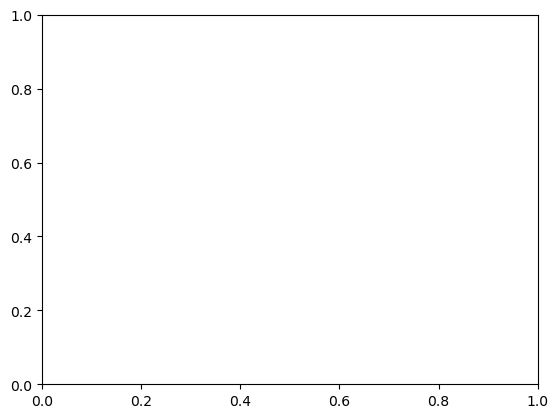

In [9]:
# Make the framework and place in "fig" and "ax" variables
fig, ax = plt.subplots()

# Specify that the column "response_time" of dataframe "df" needs to be plotted in a histogram "hist". Place this in "ax"
ax.hist(df['response_time'])

# Show the plot
plt.show()

NameError: name 'df' is not defined

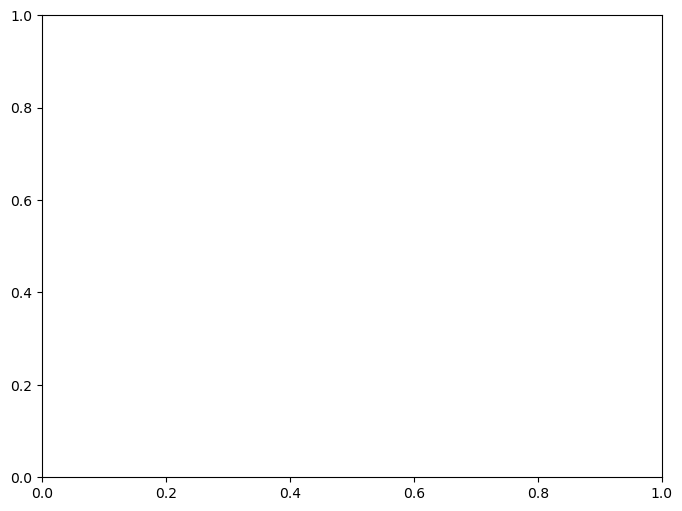

In [10]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
                       facecolor='grey', # Change background colour to grey
                       frameon=False)

ax.hist(df['response_time'],
         bins=30) # Bins defines the amount of bins you want to plot

ax.set_xlabel("RT", size=14) # label on the x-axis, size defines font size
ax.set_ylabel("Count", size=14) # label on the y-axis, size defines font size
ax.set_title("Response time distribution") # title of the plot
plt.show()

NameError: name 'df' is not defined

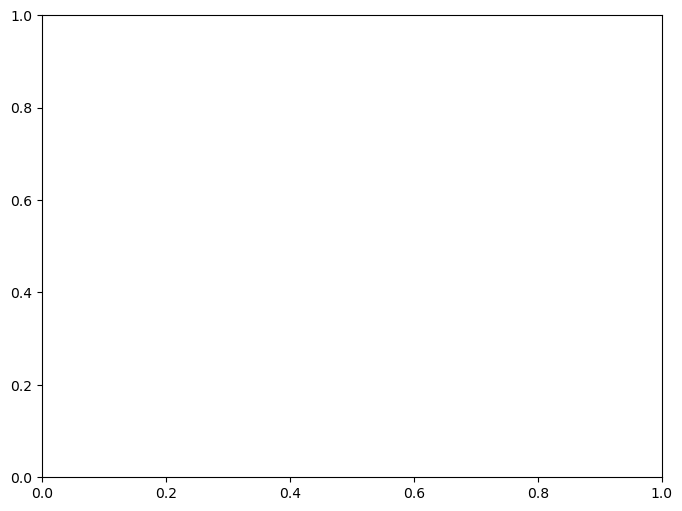

In [11]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
           facecolor='grey', # Change background colour to grey
           frameon=False) # Remove background behind the bars

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df[df['correct'] == 1]
incorrect_trials = df[df['correct'] == 0]

# Then we make two histograms. Matplotlib will place items you make in the same figure in the same "ax" if you define it so.
ax.hist(correct_trials['response_time'],
         bins=20,
         alpha=0.5, # This defines opacity of the bars
         color='green',
         label="correct trials") # This defines the label that the bar gets, for the legend

ax.hist(incorrect_trials['response_time'],
         bins=20,
         alpha=0.5,
         color='red',
         label="incorrect trials")

ax.set_xlabel("RT", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title("Correct vs incorrect response time distributions")
ax.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

NameError: name 'df' is not defined

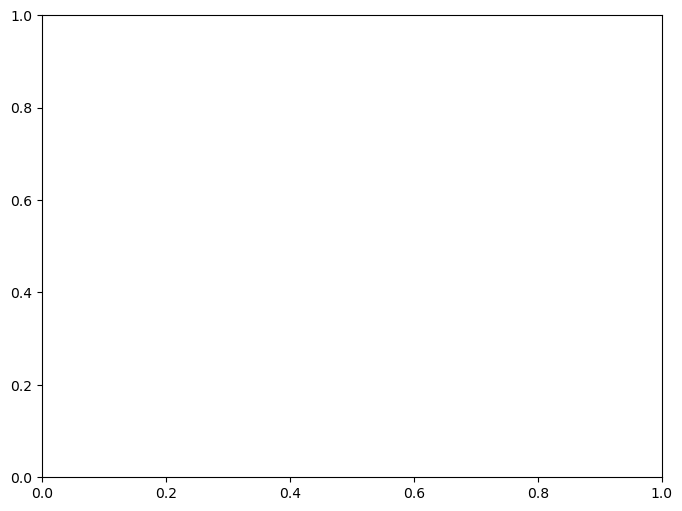

In [12]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
                       facecolor='grey', # Change background colour to grey
                       frameon=False) # Remove background behind the bars

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df[(df['correct'] == 1)]

# To fix the issue, we make a double conditional: not only should the trial be incorrect, the response also should not be 'None'
incorrect_trials = df[(df['correct'] == 0) & (df['response'] != 'None')]

# Then we make two histograms. Matplotlib will place items you make in the same figure in the same "ax" if you define it so.
ax.hist(correct_trials['response_time'],
        bins=20,
        alpha=0.5, # This defines opacity of the bars
        color='green',
        label="correct trials") # This defines the label that the bar gets, for the legend

ax.hist(incorrect_trials['response_time'],
        bins=20,
        alpha=0.5,
        color='red',
        label="incorrect trials")

ax.set_xlabel("RT", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title("Correct vs incorrect response time distributions")
ax.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

In [13]:
sns.displot(
    df,
    x="response_time", # What to code on the x-axis
    col="task_type", # Column of the grid
    row="subject_nr", # Rows of the grid
    binwidth=50, # Width of the bins
    height=3, # Height of the figure
    facet_kws=dict(margin_titles=True),
)

NameError: name 'sns' is not defined

In [14]:

#df.head()

#df['acc']
#df.acc

#df.iloc[1]

#print(df['congruency'])

#df.shape

#dfg = df.groupby('subject_nr')
#dfg.mean()

#df.groupby('subject_nr').agg([np.sum, np.mean, np.std])


df['rt_zscore'] = df.groupby(['subject_nr','congruency'])['response_time'].transform(lambda x: (x-x.mean())/x.std())

print(df)


NameError: name 'df' is not defined

In [15]:
plt.figure(figsize=(8,6));
plt.hist(df.query("congruency == 'inc' & rt_zscore <= 3").response_time, bins=100, alpha=0.5, label="data1");
plt.hist(df.query("congruency == 'inc' & rt_zscore > 3").response_time, bins=100, alpha=0.5, label="data2");

NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

In [16]:
import seaborn as sns

df['is_outlier'] = df['rt_zscore'] > 3

sns.set_theme(style="darkgrid")
sns.displot(
    df.query("subject_nr != 0"), x="response_time", col="congruency", row="subject_nr",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True), hue = "is_outlier",
)

ModuleNotFoundError: No module named 'seaborn'

In [17]:
df

NameError: name 'df' is not defined

In [18]:
df_sum = df.query("rt_zscore <= 3").groupby(['subject_nr','congruency'])['response_time'].mean()

NameError: name 'df' is not defined

In [19]:
df_sum

NameError: name 'df_sum' is not defined

In [20]:
# your answer here

NameError: name 'df' is not defined

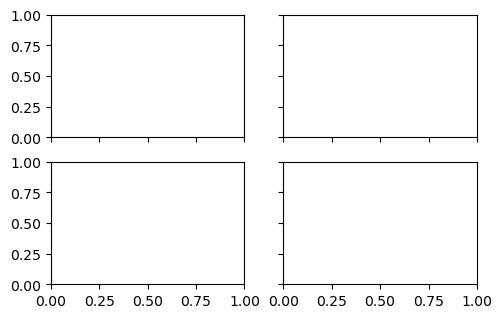

In [21]:
# A possible answer - REMOVE THIS IN THE FINAL BOOK
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(5.5, 3.5))

df_subj1_parity = df[(df['task_type'] == 'parity') & (df['subject_nr'] == 1)]
df_subj2_parity = df[(df['task_type'] == 'parity') & (df['subject_nr'] == 2)]
df_subj1_magnitude = df[(df['task_type'] == 'magnitude') & (df['subject_nr'] == 1)]
df_subj2_magnitude = df[(df['task_type'] == 'magnitude') & (df['subject_nr'] == 2)]

df_subj1_parity['response_time'].hist(ax=axs[0,0])
df_subj2_parity['response_time'].hist(ax=axs[0,1])
df_subj1_magnitude['response_time'].hist(ax=axs[1,0])
df_subj2_magnitude['response_time'].hist(ax=axs[1,1])

# Set common labels
fig.text(0.28, -0.03, 'Parity', ha='center', va='center')
fig.text(0.75, -0.03, 'Magnitude', ha='center', va='center')

axs[0,0].set_ylabel('Subject 1')
axs[1,0].set_ylabel('Subject 2')

plt.show()